In [8]:
# Just testing my github setup
print('Hello World')

Hello World


In [ ]:
#yo this is abi
print ('coding is sadge - agree')

In [ ]:
#help i don't know what i'm doing

# Hermite Polynomials
Hermite Polynomials are an orthonormal basis of the function space defined recursively by$$h_{k+1}x = \left[\left(x-\frac{d}{dx}\right)h_{k}x\right](x);$$the following function generates the Hermite Polynomials up to a degree determined by the user. For instance, $$h_1(x) = \left[\left(x-\frac{\text{d}}{\text{dx}}\right)h_0(x)\right]$$ $$= \left[x(1)-\frac{\text{d}}{\text{dx}}1\right]$$$$= x$$ Likewise, $$h_2(x) = x^2 - 1$$ and so on and so forth.

## Function Space
Our function space, as opposed to being all continuous real-valued functions, is merely the set of functions with finite square unbounded integrals, that is: $$\int_{-\infty}^{\infty} f(x)^2e^{-\frac{x^2}{2}}\,\text{d}x = 0\,\forall\,f\in V.$$

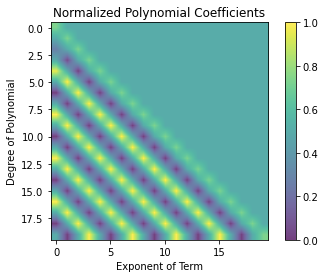

In [4]:
from matplotlib import pyplot as plt
from rich.pretty import pprint
import numpy as np
from math import exp
from tqdm import tqdm
import time

def hermite(degree: int):
    """
    Returns Hermite polynomials up to degree ``degree``;a
        Hermite polynomials defined recursively by h_{k+1}x = [(x - d/dx)h_{k}x](x)
    Polynomials are vectors (lists) whose indices correspond to the exponent of that term, e.g. [1, 0, 2, 4]
        represents 1 + x^2 + 4x^3
    TODO: Use sympy to actually handle functions correctly
    """
    polynomials = [[1], [0, 1]]
    i = 2
    while i < degree:
        # pprint('----------')
        # pprint(f'i = {i}')
        next_polynomial = [0] * (i + 1)
        for j in range(i + 1):
            # pprint(f'j = {j}')
            if j != 0:
                next_polynomial[j] += polynomials[-1][j - 1] # x*h_k(x)
                # pprint('multiplying by x')
                # pprint(f'{polynomials[-1][j - 1]}x^{j}')
            if j + 1 < len(polynomials[-1]):
                next_polynomial[j] -= polynomials[-1][j + 1] * (j + 1) # -d/dx h_k(x)
                # pprint('differentiating')
                # pprint(f'-{polynomials[-1][j + 1] * (j)}x^{j + 1}')
            # else:    
                # print(f'Done with Hermite polynomial with degree {i}')
        polynomials.append(next_polynomial)
        # pprint(f'Done with Hermite polynomial with degree {i}')
        i += 1
    return polynomials

def sigmoid(x):
    # print(x)
    try:
        return 1.0 / (1.0 + exp(-1 * x))
    except:
        return 0 if x < 0 else 1

degree = 20

hermites = hermite(degree)
plottable_polynomials = np.zeros((degree, degree))
i = 0
while i < plottable_polynomials.shape[0]:
    j = 0
    while j < plottable_polynomials.shape[1]:
        break_j = False
        try:
            plottable_polynomials[i][j] = hermites[i][j]
        except IndexError:
            break_j = True
        finally:
            j += 1
        if break_j:
            break
    i += 1
plt.imshow([[sigmoid(y) for y in x] for x in plottable_polynomials], cmap=plt.cm.viridis, alpha=.75,
           interpolation='bilinear')
plt.colorbar()
plt.title("Normalized Polynomial Coefficients")
plt.ylabel("Degree of Polynomial")
plt.xlabel("Exponent of Term")
plt.show()

# Orthonormal Basis
As we can see, each subsequent polynomial adds one degree; this occurs because of the multiplication by $x$ to generate each polynomial recursively. Because any sequence of polynomials with increasing degree up to $m$ forms a basis of $\mathcal{P}_m(\mathbb{F})$, we can conclude that the Hermite polynomials form a basis of the infinite-dimensional $\mathcal{P}_n(\mathbb{F})$. To test if they are orthonormal, we confirm that the pairwise inner products of the Hermite polynomials are 0. The inner product is defined as $$\langle f, g \rangle = \int_{-\infty}^{\infty} f(x)g(x)e^{-\frac{x^2}{2}}\,\text{d}x.$$

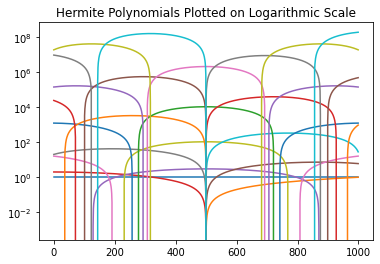

<h_0, h_1> = [0, 0]
<h_0, h_2> = [0, 0]
<h_0, h_3> = [0, 0]
<h_0, h_4> = [0, 0]
<h_0, h_5> = [0, 0]
<h_0, h_6> = [0, 0]
<h_0, h_7> = [0, 0]
<h_0, h_8> = [0, 0]
<h_0, h_9> = [0, 0]
<h_0, h_10> = [0, 0]
<h_0, h_11> = [0, 0]
<h_0, h_12> = [0, 0]
<h_0, h_13> = [0, 0]
<h_0, h_14> = [0, 0]
<h_0, h_15> = [0, 0]
<h_0, h_16> = [0, 0]
<h_0, h_17> = [0, 0]
<h_0, h_18> = [0, 0]
<h_0, h_19> = [0, 0]
<h_1, h_2> = [0, 0]
<h_1, h_3> = [0, 0]
<h_1, h_4> = [0, 0]
<h_1, h_5> = [0, 0]
<h_1, h_6> = [0, 0]
<h_1, h_7> = [0, 0]
<h_1, h_8> = [0, 0]
<h_1, h_9> = [0, 0]
<h_1, h_10> = [0, 0]
<h_1, h_11> = [0, 0]
<h_1, h_12> = [0, 0]
<h_1, h_13> = [0, 0]
<h_1, h_14> = [0, 0]
<h_1, h_15> = [0, 0]
<h_1, h_16> = [0, 0]
<h_1, h_17> = [0, 0]
<h_1, h_18> = [0, 0]
<h_1, h_19> = [0, 0]
<h_2, h_3> = [0, 0]
<h_2, h_4> = [0, 0]
<h_2, h_5> = [0, 0]
<h_2, h_6> = [0, 0]
<h_2, h_7> = [0, 0]
<h_2, h_8> = [0, 0]
<h_2, h_9> = [0, 0]
<h_2, h_10> = [0, 0]
<h_2, h_11> = [0, 0]
<h_2, h_12> = [0, 0]
<h_2, h_13> = [0, 0]
<h_2, h_14> = [0

/var/folders/_9/wz63bnz534v5bh3g4khkqndc0000gn/T/ipykernel_37660/3978351107.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(prod, -np.inf, np.inf)


<h_8, h_18> = [0, 0]
<h_8, h_19> = [0, 0]
<h_9, h_10> = [0, 0]
<h_9, h_11> = [0, 0]
<h_9, h_12> = [0, 0]
<h_9, h_13> = [0, 0]
<h_9, h_14> = [0, 0]
<h_9, h_15> = [0, 0]
<h_9, h_16> = [0, 0]
<h_9, h_17> = [0, 0]
<h_9, h_18> = [0, 0]
<h_9, h_19> = [0, 0]
<h_10, h_11> = [0, 0]
<h_10, h_12> = [0, 0]
<h_10, h_13> = [0, 0]
<h_10, h_14> = [0, 0]
<h_10, h_15> = [0, 0]
<h_10, h_16> = [0, 0]
<h_10, h_17> = [0, 0]
<h_10, h_18> = [0, 0]
<h_10, h_19> = [0, 0]
<h_11, h_12> = [0, 0]
<h_11, h_13> = [0, 0]
<h_11, h_14> = [0, 0]
<h_11, h_15> = [0, 0]
<h_11, h_16> = [0, 0]
<h_11, h_17> = [0, 0]
<h_11, h_18> = [0, 0]
<h_11, h_19> = [0, 0]
<h_12, h_13> = [0, 0]
<h_12, h_14> = [0, 0]
<h_12, h_15> = [0, 0]
<h_12, h_16> = [0, 0]
<h_12, h_17> = [0, 0]
<h_12, h_18> = [0, 0]
<h_12, h_19> = [0, 0]
<h_13, h_14> = [0, 0]
<h_13, h_15> = [0, 0]
<h_13, h_16> = [0, 0]
<h_13, h_17> = [0, 0]
<h_13, h_18> = [0, 0]
<h_13, h_19> = [-1, 1]
<h_14, h_15> = [0, 0]
<h_14, h_16> = [0, 0]
<h_14, h_17> = [0, 0]
<h_14, h_18> = [0, 1]

In [20]:
from scipy.integrate import quad

# integral = quad(integrand,-np.inf,np.inf)

def polynomify(coeffs):
    f = lambda x: sum([value * x**count for count, value in enumerate(coeffs)])
    return f

def inner_prod(f, g):
    fx = lambda x: f(x)
    gx = lambda x: g(x)
    special_exp = lambda x: exp((-1.0 * x**2)/2)
    prod = lambda x: fx(x) * gx(x) * special_exp(x)
    
    return quad(prod, -np.inf, np.inf)

fns = [polynomify(i) for i in hermites]
x = np.linspace(-1, 1, 1000)
fns_plotted = [[fn(i) for fn in fns] for i in x]
plt.plot(fns_plotted)
plt.yscale('log')
plt.title('Hermite Polynomials Plotted on Logarithmic Scale')
plt.show()

i = 0

while i < len(hermites):
    j = i + 1
    while j < len(hermites):
        f = lambda x: polynomify(hermites[i])(x)
        g = lambda x: polynomify(hermites[j])(x)
        prod = lambda x: f(x) * g(x)

        print(f'<h_{i}, h_{j}> = {[round(i) for i in (inner_prod(f, g))]}')
        j += 1
    i += 1

## Orthonormality
Ignoring the stragglers at the end whose imprecision is probably due to imprecision in the `quad` method in `scipy`, all the inner products $\langle f, g \rangle = 0$, so we can say that the $\textbf{Hermite Polynomials form an orthonormal basis of our function space}$.

# Convolution Operator
~~We~~ Ted defines the convolution operator $C_f \in \mathcal{L}(V)$ as follows: $$[C_fg](t) = (f*g)(t) = \int_{-\infty}^{\infty}f(s)g(t-s)\,\text{d}s.$$ We are to find out how the decompositions of $f$ and $g$ into Hermite Polynomials allow us to represent the action of $[C_fg]$ as a linear combination of Hermite Polynomials and then study the properties of $[C_fg]$. Finally, we must create a computational environment to solve these so-called "Convolutional Equations" of the form $f*g = h$ where $f, h$ are known.

## Decompositions
First, we find how to decompose $f$ as a linear combination of Hermite Polynomials. Becuase the Hermite Polynomials form an orthonormal basis of $V$, we can get the coefficients easily. $$f = \langle f, h_0 \rangle h_0 + \langle f, h_1 \rangle h_1 + \cdots$$ Hence, we can express $C_fg$ as a product of these decompositions.
$$[C_fg](t) = (f*g)(t) = \int_{-\infty}^{\infty}f(s)g(t-s)\,\text{d}s \\ = \int_{-\infty}^{\infty} \left[\langle f, h_0 \rangle h_0 + \langle f, h_1 \rangle h_1 + \cdots\right](s)\left[\langle g, h_0 \rangle h_0 + \langle g, h_1 \rangle h_1 + \cdots\right](t - s)\,\text{d}s$$

# Sandbox (sympy testing, matplotlib playing, etc.)

# Sandbox (sympy testing, matplotlib playing, etc.)

In [30]:
from sympy import poly
from sympy.abc import x
from sympy import *

f = poly(x**2 + 1, x)
g = poly(x**3 + 2*x)

print(f*g.integrate()(100))

PolynomialError: a valid generator expected, got -inf